In [1]:
# 1. ライブラリのインポート
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (5, 3)
sns.set_style("whitegrid")

In [2]:
# 2. データの読み込み
df = pd.read_csv("/content/drive/MyDrive/Kaggle youtube trending videos/archive (6)/youtube.csv")

In [3]:
# 3. データの基本情報確認
## 3-1. head()
df.head()
## 3-2. info()
df.info()
## 3-3. describe()
df.describe(include="all")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161470 entries, 0 to 161469
Data columns (total 18 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   index                   161470 non-null  int64 
 1   video_id                161470 non-null  object
 2   trending_date           161470 non-null  object
 3   title                   161470 non-null  object
 4   channel_title           161470 non-null  object
 5   category_id             161470 non-null  int64 
 6   publish_date            161470 non-null  object
 7   time_frame              161470 non-null  object
 8   published_day_of_week   161470 non-null  object
 9   publish_country         161470 non-null  object
 10  tags                    161470 non-null  object
 11  views                   161470 non-null  int64 
 12  likes                   161470 non-null  int64 
 13  dislikes                161470 non-null  int64 
 14  comment_count           161470 non-n

,index,video_id,trending_date,title,channel_title,category_id,publish_date,time_frame,published_day_of_week,publish_country,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
count,161470.00000,161470,161470,161470,161470,161470.000000,161470,161470,161470,161470,161470,1.614700e+05,1.614700e+05,1.614700e+05,1.614700e+05,161470,161470,161470
unique,NaN,55886,205,56905,12361,NaN,471,24,7,4,50239,NaN,NaN,NaN,NaN,2,2,2
top,NaN,#NAME?,17.14.11,Childish Gambino - This Is America (Official V...,The Late Show with Stephen Colbert,NaN,20/12/2017,16:00 to 16:59,Friday,US,[none],NaN,NaN,NaN,NaN,False,False,False
freq,NaN,1799,800,73,653,NaN,1307,16477,28622,40949,11234,NaN,NaN,NaN,NaN,158682,160046,161329
mean,80734.50000,NaN,NaN,NaN,NaN,19.461151,NaN,NaN,NaN,NaN,NaN,2.419854e+06,6.566194e+04,3.490153e+03,7.035494e+03,NaN,NaN,NaN
std,46612.51832,NaN,NaN,NaN,NaN,7.432001,NaN,NaN,NaN,NaN,NaN,1.043749e+07,2.260617e+05,3.114779e+04,3.404121e+04,NaN,NaN,NaN
min,0.00000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,2.230000e+02,0.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN,NaN
25%,40367.25000,NaN,NaN,NaN,NaN,15.000000,NaN,NaN,NaN,NaN,NaN,1.015382e+05,1.975000e+03,8.500000e+01,2.790000e+02,NaN,NaN,NaN
50%,80734.50000,NaN,NaN,NaN,NaN,23.000000,NaN,NaN,NaN,NaN,NaN,3.847395e+05,9.840000e+03,3.480000e+02,1.144000e+03,NaN,NaN,NaN
75%,121101.75000,NaN,NaN,NaN,NaN,24.000000,NaN,NaN,NaN,NaN,NaN,1.339528e+06,4.006275e+04,1.350000e+03,4.144750e+03,NaN,NaN,NaN


In [4]:
# 4. 前処理
## 4-1. 欠損値確認
## 4-2. 型変換（特に日付）

df['publish_date'] = pd.to_datetime(df['publish_date'], errors='coerce')
df['publish_dayofweek'] = df['publish_date'].dt.weekday
df['publish_hour'] = df['time_frame'].str.split(':', expand=True)[0].astype(int)

## 4-3. カラム整形

df['title_length'] = df['title'].astype(str).apply(len)
df['like_rate'] = df['likes'] / df['views']
df['like_rate'] = df['like_rate'].replace([np.inf, -np.inf], np.nan)
df['comment_rate'] = df['comment_count'] / df['views']
df['comment_rate'] = df['comment_rate'].replace([np.inf, -np.inf], np.nan)
cols_to_drop = ['index','trending_date','comments_disabled','ratings_disabled','video_error_or_removed','video_id','tags','published_day_of_week','time_frame']

df = df.drop(columns=cols_to_drop)

/tmp/ipython-input-4148800387.py:5: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['publish_date'] = pd.to_datetime(df['publish_date'], errors='coerce')


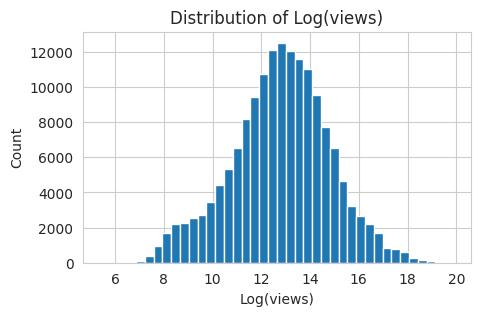

In [5]:
df['views_log'] = np.log1p(df['views'])

plt.hist(df['views_log'], bins=40)
plt.title("Distribution of Log(views)")
plt.xlabel("Log(views)")
plt.ylabel("Count")
plt.show()

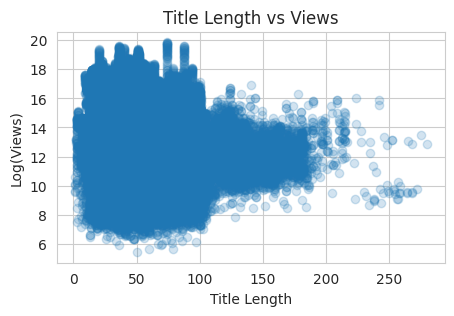

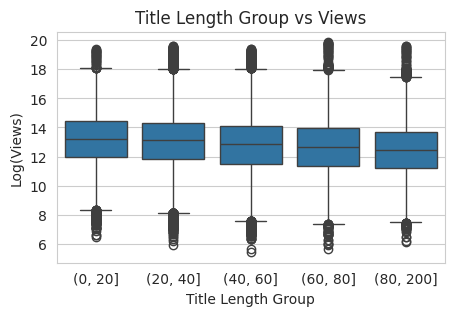

In [19]:
# 5. 分析
## 5-1. タイトルの長さと再生数
plt.scatter(df['title_length'], df['views_log'], alpha=0.2)
plt.xlabel("Title Length")
plt.ylabel("Log(Views)")
plt.title("Title Length vs Views")
plt.show()

df['title_len_group'] = pd.cut(df['title_length'], bins=[0,20,40,60,80,200])

plt.figure(figsize=(5,3))
sns.boxplot(data=df, x='title_len_group', y='views_log')
plt.title("Title Length Group vs Views")
plt.xlabel("Title Length Group")
plt.ylabel("Log(Views)")
plt.show()

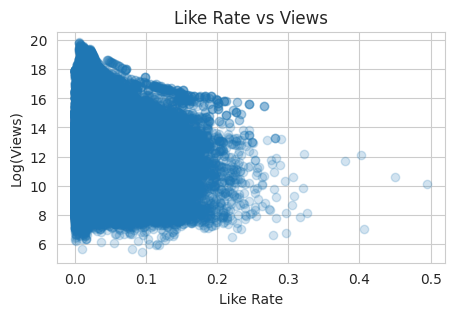

In [21]:
## 5-2. 高評価率と再生数
plt.scatter(df['like_rate'], df['views_log'], alpha=0.2)
plt.xlabel("Like Rate")
plt.ylabel("Log(Views)")
plt.title("Like Rate vs Views")
plt.show()

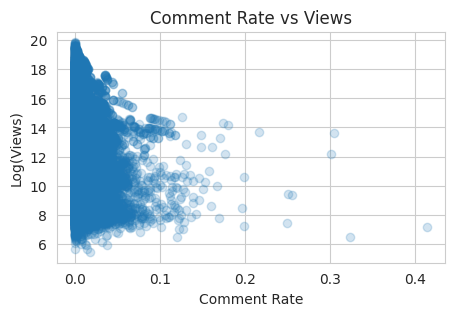

In [16]:
## 5-3. コメント率と再生数
plt.scatter(df['comment_rate'], df['views_log'], alpha=0.2)
plt.xlabel("Comment Rate")
plt.ylabel("Log(Views)")
plt.title("Comment Rate vs Views")
plt.show()

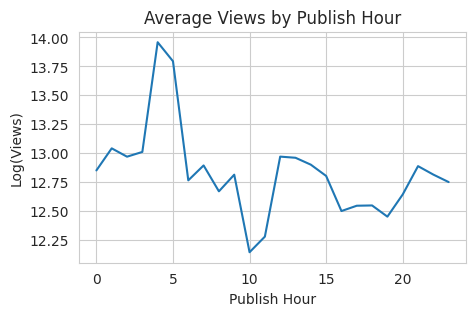

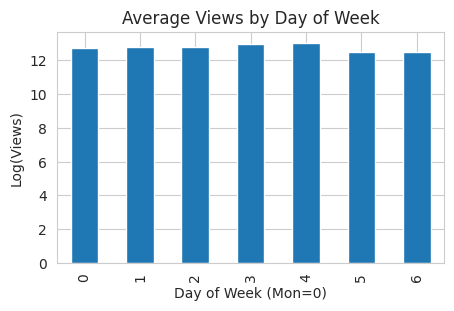

In [15]:
## 5-4. 投稿時刻と再生数
hourly = df.groupby('publish_hour')['views_log'].mean()

hourly.plot(kind='line')
plt.title("Average Views by Publish Hour")
plt.xlabel("Publish Hour")
plt.ylabel("Log(Views)")
plt.show()

weekday = df.groupby('publish_dayofweek')['views_log'].mean()

weekday.plot(kind='bar')
plt.title("Average Views by Day of Week")
plt.xlabel("Day of Week (Mon=0)")
plt.ylabel("Log(Views)")
plt.show()


## 1. 結論
本分析では、YouTube動画データ（約160,000件）を基に\
再生数に影響する主要因を特定した。\
特に以下の3点が重要であるとわかった。
* ① 投稿時間（publish_hour）が最も影響が大きい   
* ② タイトル長（title_length）は40〜60文字が最も良い
* ③ 高評価率（like_rate）は動画の質を示す指標として有効  
---
## 2. 分析の目的
今回の分析の目的は以下の通りである:
* 再生数を増やすために改善できる要素を特定する
* 投稿戦略と動画制作の優先順位を明確にする
* YouTube運用改善のための仮説を得る
---
## 3. データ概要
* 使用データ:YouTube Trending Videos Dataset
* サンプル数:約160,000動画
* 主なカラム:
* views,likes, dislikes, comment_count
* publish_time（datetime化済み）
* title_length（タイトル文字数）
* like_rate（高評価率）
* comment_rate（コメント率）
---
## 4. 分析手順
1. データの前処理（不要データ除去、日付処理、特徴量作成）
2. 再生数の分布確認（log で安定化）
3. 各要因ごとの比較分析
*  タイトル長
*  投稿時間
*  曜日
*  高評価率
---
## 5. 分析結果の詳細
5-1. タイトル文字数と再生数
* 文字数が長すぎる（100以下）と伸びにくい傾向
* 100以内が最も安定して高い再生数

5-2. 投稿時間と再生数
* 4～5時に投稿された動画が最も高い再生数
* 10～11は再生数が低い

5-3. 曜日別の再生数
* 土日よりも平日が最も強い
* 特に木・金が高い傾向

5-4. 高評価率と再生数
* like_rate が 0.03〜0.08 がボリュームゾーン
---
## 6. 最終提案
* **提案①**:投稿時間を夜に集中させる\
4,5時に投稿することで、平均再生数が大幅に改善される可能性がある。\
* **提案②**:タイトルは100文字以内を目安に\
情報量・クリック率のバランスが良く、伸びやすい。\
* **提案③**:like_rate 0.03を目標指標にする\
動画の質を示す指標として改善目標に設定可能。



In [22]:
# 図を保存するフォルダを作る（Colab上）
import os
os.makedirs('figures', exist_ok=True)

# 例：再生数分布
plt.figure()
plt.hist(df['views_log'].dropna(), bins=40)
plt.title("Distribution of Log(views)")
plt.xlabel("Log(views)")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig('figures/views_distribution.png', dpi=150)
plt.close()

# 例：タイトル長 vs views
plt.figure(figsize=(8,4))
plt.scatter(df['title_length'], df['views_log'], alpha=0.2)
plt.xlabel("Title Length")
plt.ylabel("Log(Views)")
plt.title("Title Length vs Views")
plt.tight_layout()
plt.savefig('figures/title_length_vs_views.png', dpi=150)
plt.close()

# 例：投稿時間 vs 平均views
hourly = df.groupby('publish_hour')['views_log'].mean()
plt.figure(figsize=(8,4))
hourly.plot(kind='line', marker='o')
plt.title("Average Views by Publish Hour")
plt.xlabel("Publish Hour")
plt.ylabel("Log(Views)")
plt.tight_layout()
plt.savefig('figures/publish_hour_vs_views.png', dpi=150)
plt.close()

print("figures saved:", os.listdir('figures'))


figures saved: ['views_distribution.png', 'title_length_vs_views.png', 'publish_hour_vs_views.png']
